In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the datasets
(X_train, y_train), (X_test,y_test)=fashion_mnist.load_data()

# Normalize the dataset
X_train=X_train/255.0
X_test= X_test/255.0

# One-hot encode the labels
y_train=to_categorical(y_train,10) 
y_test=to_categorical(y_test,10)

In [3]:

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


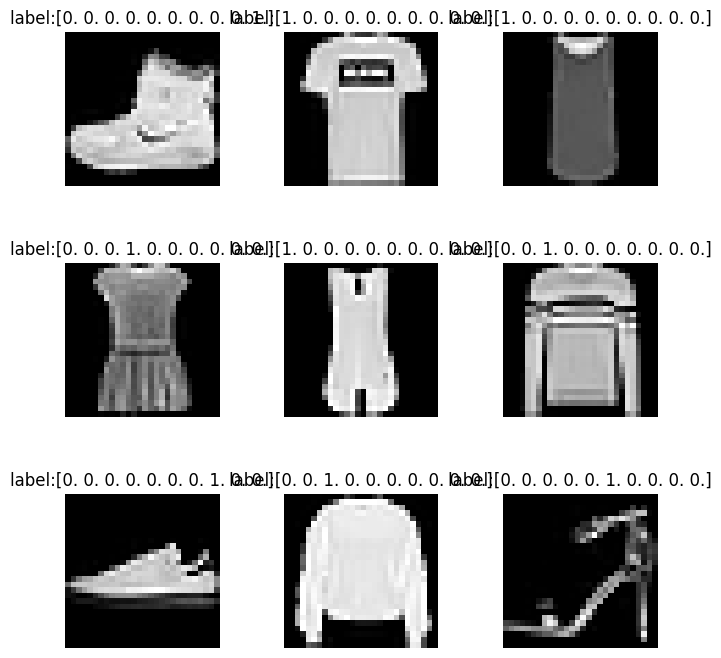

In [4]:
# plot a few sample images from the dataset along with their label.
fig, axes= plt.subplots(3,3, figsize=(8,8))
axes=axes.ravel()

for i in np.arange(0,9):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"label:{y_train[i]}")
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [5]:
# Split the datasets into training and validation sets
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [6]:
# define neural network moodel

model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\IICET\DEEP_LEARNING_ALGORITHM\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# train the model
history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7683 - loss: 0.6694 - val_accuracy: 0.8509 - val_loss: 0.4181
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8609 - loss: 0.3778 - val_accuracy: 0.8708 - val_loss: 0.3611
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8770 - loss: 0.3360 - val_accuracy: 0.8734 - val_loss: 0.3572
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8846 - loss: 0.3138 - val_accuracy: 0.8807 - val_loss: 0.3350
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8916 - loss: 0.2908 - val_accuracy: 0.8827 - val_loss: 0.3231
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8939 - loss: 0.2762 - val_accuracy: 0.8808 - val_loss: 0.3298
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9012 - loss: 0.2656 - val_accuracy: 0.8852 - val_loss: 0.3195
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9031 - loss: 0.2561 - 

In [9]:
# Evaluate the model
loss, accuracy=model.evaluate(X_test, y_test)
print(f'Accuracy:{accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8836 - loss: 0.3462
Accuracy:88.31%


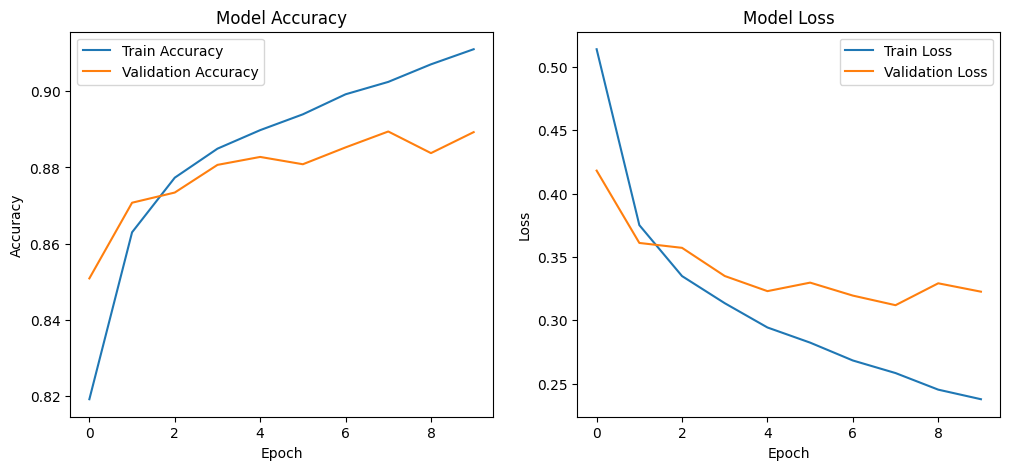

In [10]:
# plot accuarcy and loss graphs
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
